In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
temps = np.array([280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 
                  290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 
                  300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 
                  310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320])

In [22]:
C_Ts_pyrads = xr.DataArray(np.zeros(len(temps)), dims=['Ts'], coords={'Ts': temps})

In [23]:
for temp in temps:
    arr = np.load(f"co2_{temp}K.npy")
    C_Ts_pyrads.loc[dict(Ts=temp)]=arr[0]

C_Ts_pyrads

<xarray.DataArray (Ts: 41)>
array([9.57305300e+00, 1.53126302e+01, 2.40839389e+01, 3.69842429e+01,
       5.52210527e+01, 1.04962544e+02, 1.50633755e+02, 2.08702668e+02,
       2.79500000e+02, 3.63536475e+02, 4.57456250e+02, 7.39485026e+02,
       9.16116257e+02, 1.10836211e+03, 1.30703580e+03, 1.50056625e+03,
       2.24605221e+03, 2.59147872e+03, 2.92346481e+03, 3.21913513e+03,
       3.45319497e+03, 3.60111506e+03, 5.42864580e+03, 5.86017174e+03,
       6.20566207e+03, 6.40517520e+03, 6.42591986e+03, 6.24237096e+03,
       1.00787867e+04, 1.06374530e+04, 1.10034687e+04, 1.10881868e+04,
       1.08186099e+04, 1.01667052e+04, 9.17701029e+03, 1.87326358e+04,
       2.22197547e+04, 2.65716574e+04, 3.19040154e+04, 3.82480302e+04,
       4.56689179e+04])
Coordinates:
  * Ts       (Ts) int64 280 281 282 283 284 285 286 ... 315 316 317 318 319 320

In [24]:
Ts_C_pyrads = xr.DataArray(temps, dims=['CO2'], 
                           coords={'CO2':xr.DataArray(C_Ts_pyrads.values, dims=['CO2'], attrs={'units':'ppmv'})},
                           attrs={'standard_name': 'Ts', 'units': 'K'})

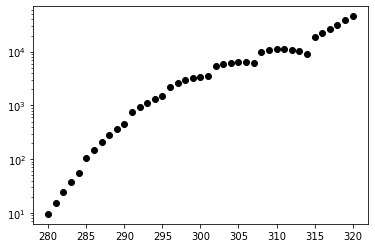

In [14]:
fig, ax = plt.subplots()
        
ax.scatter(C_Ts_pyrads.Ts, C_Ts_pyrads, color='k')
    
ax.set_yscale('log')

In [19]:
da_ECS_pyrads = C_Ts_pyrads.copy()
da_ECS_pyrads.attrs = {'standard_name':'ECS', 'units': 'K'}

In [25]:
for temp in da_ECS_pyrads.Ts:
    conc = C_Ts_pyrads.sel(Ts=temp)
    da_ECS_pyrads.loc[dict(Ts=temp)] = Ts_C_pyrads.interp(CO2=2*conc) - Ts_C_pyrads.sel(CO2=conc) 

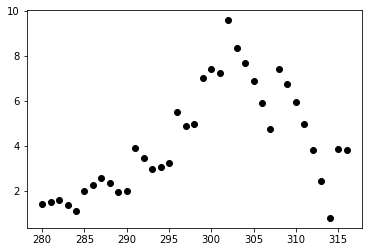

In [29]:
fig, ax = plt.subplots()
        
ax.scatter(da_ECS_pyrads.Ts, da_ECS_pyrads, color='k')

In [7]:
import pickle

data_path = "../lambdanu_ctrl.pickle"

with open(data_path,mode='rb') as f:
    data = pickle.load(f)

for key,val in data.items():
    exec(key + '=val')

In [8]:
C_Ts = xr.DataArray(dims=['Ts'], coords={'Ts':np.arange(280,326)})


for t in np.arange(280, 326):
    C_Ts.loc[dict(Ts=t)] = lambdanu[t]['co2_ppm']


In [9]:
C_Ts.sel(Ts=320)

<xarray.DataArray ()>
array(73017.82198)
Coordinates:
    Ts       int64 320

280 [9.573053]
281 [15.31263016]
282 [24.08393894]
283 [36.98424288]
284 [55.22105271]
285 [104.96254367]
286 [150.63375492]
287 [208.70266816]
288 [279.5]
289 [363.53647497]
290 [457.4562503]
291 [739.48502606]
292 [916.11625664]
293 [1108.36210705]
294 [1307.03579745]
295 [1500.56624616]
296 [2246.05220972]
297 [2591.47871965]
298 [2923.46481279]
299 [3219.13512759]
300 [3453.19497477]
301 [3601.11505559]
302 [5428.64580211]
303 [5860.17174434]
304 [6205.66206607]
305 [6405.17519614]
306 [6425.91986259]
307 [6242.3709554]
308 [10078.78668024]
309 [10637.45301599]
310 [11003.46865853]
311 [11088.18683302]
312 [10818.60990915]
313 [10166.70520599]
314 [9177.01028617]
315 [18732.63584934]
316 [22219.75468934]
317 [26571.65741774]
318 [31904.01541883]
319 [38248.03015757]
320 [45668.91794662]


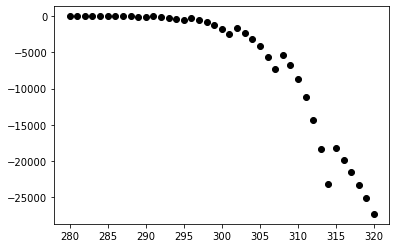

In [10]:
import os

fig, ax = plt.subplots()

for temp in temps:

    arr = np.load(f"co2_{temp}K.npy")
    print(temp, arr)
        
    #ax.scatter(temp, arr, color='k')
    ax.scatter(temp, arr[0]-C_Ts.sel(Ts=temp), color='k')
    
    
#ax.scatter(C_Ts.Ts, C_Ts, color='red')
#ax.set_yscale('log')